In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Load dataset
df = pd.read_csv('../data/Space_Corrected.csv')

In [82]:
# Drop Unnamed columns que não servem pra nada
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [83]:
# Mostrar shape e colunas
print(f"Dataset shape: {df.shape}")
print("Columns: ")
print(df.columns.to_list())

Dataset shape: (4324, 7)
Columns: 
['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', ' Rocket', 'Status Mission']


In [84]:
# Info e nulos
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB
None

Missing values:
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64


In [85]:
# Estatísticas básicas
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
       Company Name                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                             Datum                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Status Rocket  Rocket Status Mission  
count            4324     964           4324  
unique              2      56              4  
top     StatusRetired  450.0         Success  
freq             3534     136           3879  


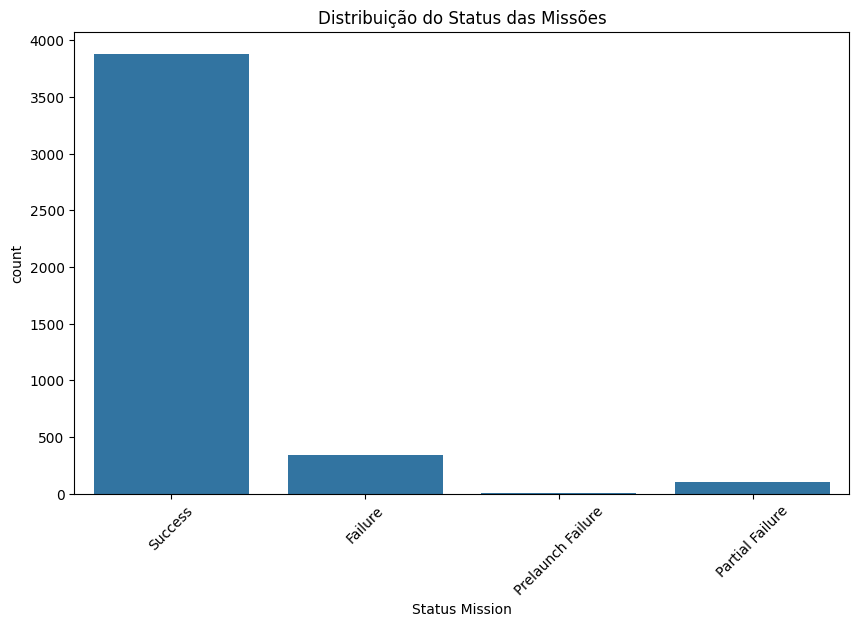

In [86]:
# Plot distribuição do Status Mission 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Status Mission')
plt.title("Distribuição do Status das Missões")
plt.xticks(rotation=45)
plt.show()

In [87]:
# Criando coluna Year a partir de Datum 
df['Year'] = pd.to_datetime(df['Datum'], errors='coerce').dt.year

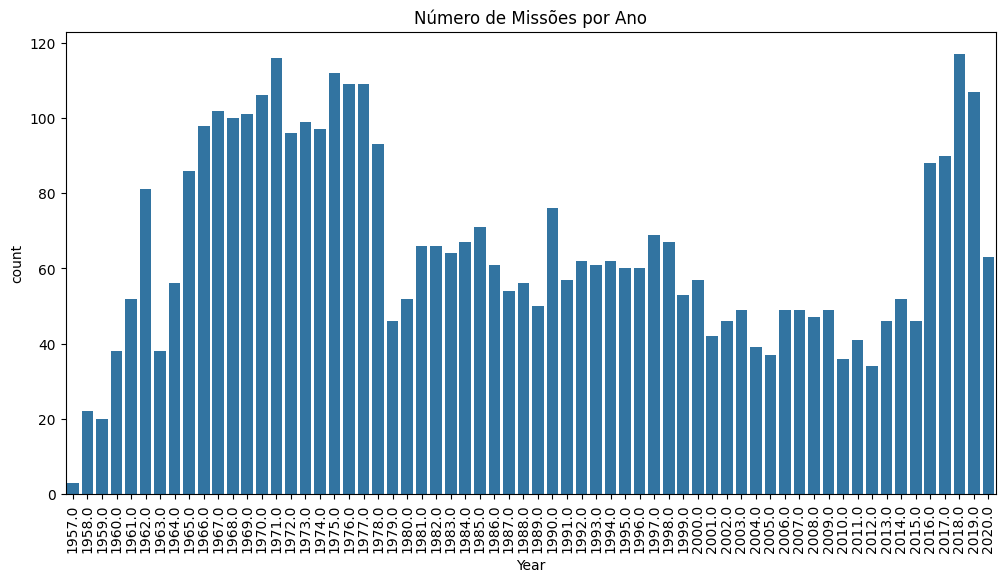

In [88]:
# Plot número de missões por ano
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year')
plt.title("Número de Missões por Ano")
plt.xticks(rotation=90)
plt.show()

In [89]:
# Valores únicos das colunas de status
print("Unique 'Status Mission' values:")
print(df['Status Mission'].value_counts())

print("\nUnique 'Status Rocket' values:")
print(df['Status Rocket'].value_counts())

Unique 'Status Mission' values:
Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

Unique 'Status Rocket' values:
Status Rocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


In [90]:
# Top 10 companies que mais lançaram missões
print("\nTop 10 Companies by launch count:")
print(df['Company Name'].value_counts().head(10))


Top 10 Companies by launch count:
Company Name
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64


In [91]:
# Ver quantos nulos tem em cada coluna de interesse
print("\nMissing values per relevant column:")
print(df[['Status Mission', 'Status Rocket', 'Company Name', 'Datum']].isnull().sum())


Missing values per relevant column:
Status Mission    0
Status Rocket     0
Company Name      0
Datum             0
dtype: int64


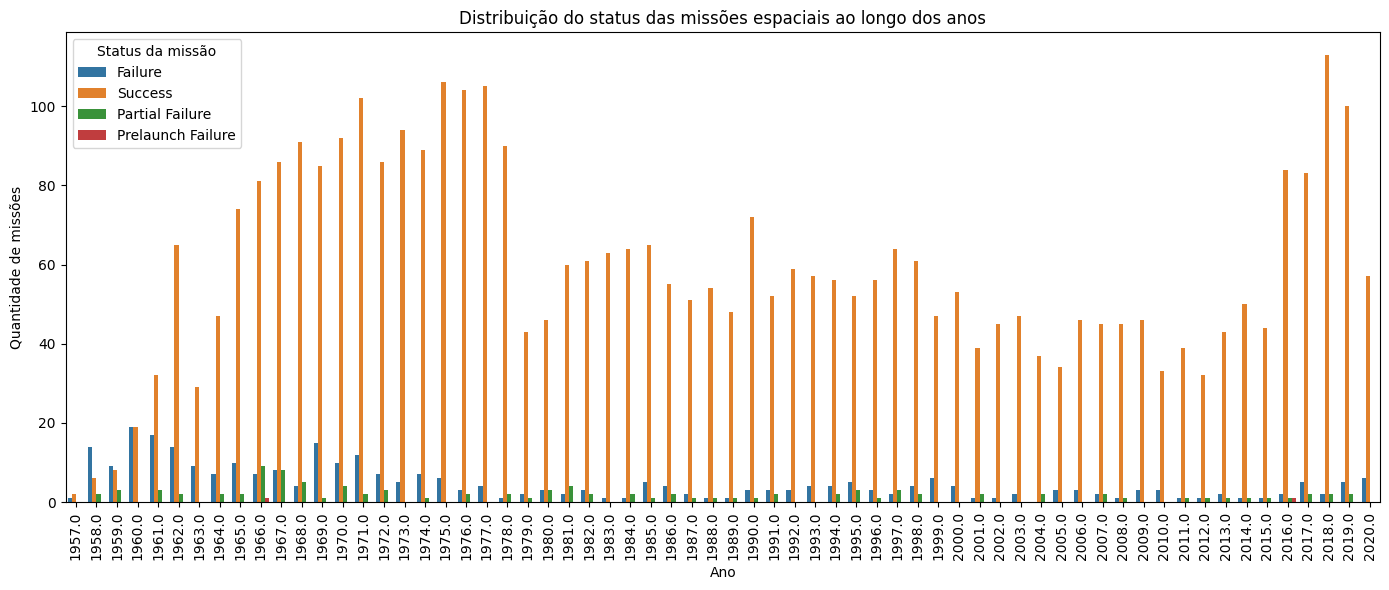

In [92]:
# Agrupando quantidade de missões por ano e status 
status_por_ano =df.groupby(['Year', 'Status Mission']).size().reset_index(name='Total')

# Visualização 
plt.figure(figsize=(14, 6))
sns.barplot(data=status_por_ano, x='Year', y='Total', hue='Status Mission')
plt.title("Distribuição do status das missões espaciais ao longo dos anos")
plt.xticks(rotation=90)
plt.ylabel("Quantidade de missões")
plt.xlabel("Ano")
plt.legend(title="Status da missão")
plt.tight_layout()
plt.show()

In [93]:
# Limpar espaços e padronizar maiúsculas/minúsculas
df['Status Mission'] = df['Status Mission'].str.strip().str.title()

In [94]:
# Pegando anos válidos 
df2 = df.dropna(subset=['Year', 'Status Mission'])


In [95]:
totais = df2.groupby('Year').size()
sucessos = df2[df2['Status Mission'] == 'Success'].groupby('Year').size()

In [96]:
taxa_sucesso = (sucessos / totais * 100).fillna(0)

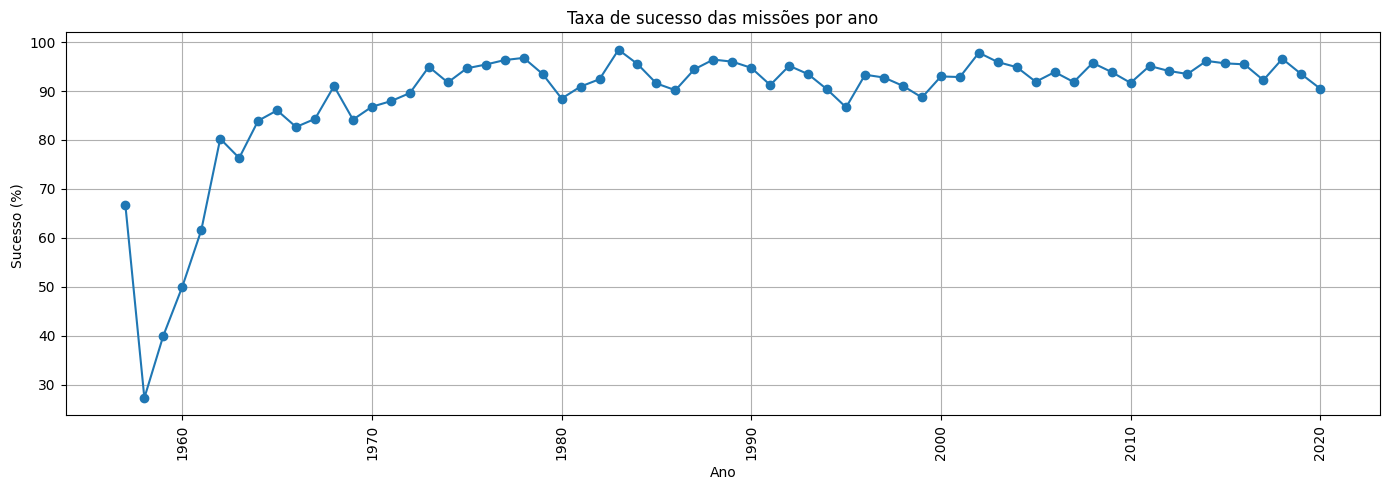

In [97]:
plt.figure(figsize=(14,5))
taxa_sucesso.plot(marker = 'o')
plt.title("Taxa de sucesso das missões por ano")
plt.ylabel("Sucesso (%) ")
plt.xlabel("Ano")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# Garantindo que os valores estão limpos 
df['Status Mission'] = df['Status Mission'].str.strip().str.title()
df2 = df.dropna(subset=['Company Name', 'Status Mission'])

In [100]:
# Agrupando missões 
empresas = df2.groupby(['Company Name', 'Status Mission']).size().unstack(fill_value=0)

In [101]:
# Adicionando total de missões
empresas['Total'] = empresas.sum(axis=1)

In [102]:
# Calcular taxa de sucesso
if 'Success' in empresas.columns:
    empresas['Taxa de Sucesso (%)'] = (empresas['Success'] / empresas['Total']) * 100
else:
    empresas['Taxa de Sucesso (%)'] = 0

In [103]:
top10 = empresas.sort_values('Total', ascending=False).head(10)
print(top10[['Total', 'Taxa de Sucesso (%)']])

Status Mission    Total  Taxa de Sucesso (%)
Company Name                                
RVSN USSR          1777            90.827237
Arianespace         279            96.415771
General Dynamics    251            80.876494
CASC                251            92.031873
NASA                203            91.625616
VKS RF              201            93.532338
US Air Force        161            80.124224
ULA                 140            99.285714
Boeing              136            96.323529
Martin Marietta     114            87.719298
